<a href="https://colab.research.google.com/github/geo-tp/Keras-Colaboratory-Models/blob/main/population_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict the number of inhabitants of a French municipaly



## Import

In [13]:
from sys import path
import pandas as pd
import numpy as np
import random
from time import mktime
from datetime import datetime
from keras import models
from keras import layers
from keras.callbacks import Callback, LearningRateScheduler

## Dataset

In [14]:
# CSV file MDB-INSEE-V2 - 36679 records about French municipalities
# 92 columns, we will only use 17 of them

base_dir = path[0] + "/drive/MyDrive/communes-dataset/"

csv_file = pd.read_csv(
    base_dir + "MDB-INSEE-V2.csv",
    usecols=[
        # features
        "Nb Pharmacies et parfumerie",
        "Dynamique Entrepreneuriale",
        "Dynamique Entrepreneuriale Service et Commerce",
        "Nb Omnipraticiens BV",
        "Nb Infirmiers Libéraux BV",
        "Nb dentistes Libéraux BV",
        "Nb pharmaciens Libéraux BV",
        "Nb Logement",
        "Nb Résidences Secondaires",
        "Nb Log Vacants",
        "Nb Entreprises Secteur Services",
        "Nb Entreprises Secteur Commerce",
        "Nb Entreprises Secteur Construction",
        "Nb Entreprises Secteur Industrie",
        "Nb Création Enteprises",
        "Nb Hotel",
        "Nb Camping",
        
        # target
        "Population"
    ],
)

# Shuffle
csv_file = csv_file.sample(frac=1)

print("Example of an entry from dataset")
print(csv_file.loc[[0]])

Example of an entry from dataset
   Nb Pharmacies et parfumerie  Dynamique Entrepreneuriale  \
0                          0.0                        57.0   

   Dynamique Entrepreneuriale Service et Commerce  Nb Omnipraticiens BV  \
0                                            23.0                     9   

   Nb Infirmiers Libéraux BV  Nb dentistes Libéraux BV  \
0                         14                         7   

   Nb pharmaciens Libéraux BV  Population  Nb Logement  \
0                           7         725          289   

   Nb Résidences Secondaires  Nb Log Vacants  Nb Entreprises Secteur Services  \
0                         32               9                              7.0   

   Nb Entreprises Secteur Commerce  Nb Entreprises Secteur Construction  \
0                             11.0                                  2.0   

   Nb Entreprises Secteur Industrie  Nb Création Enteprises  Nb Hotel  \
0                               2.0                     4.0       0.0 

In [15]:
# Preprocessing

# Get targets and remove it from csv
y_set = csv_file["Population"].to_numpy()
csv_file = csv_file.drop('Population',axis=1)

# Get features
x_set = csv_file.values
x_set = x_set.astype(int)

# Harmonize values to be on the same range
mean = x_set.mean(axis=0)
x_set = x_set - mean
std = x_set.std(axis=0)
x_set /= std

# Devide values to be smaller
y_set = y_set.astype(float)
y_set /= 1000.

print("Example of a preprocessed data")
print("Features : ", x_set[0])
print("Population : ", y_set[0])

Example of a preprocessed data
Features :  [ 0.00522167  0.00522167  0.00522167 -0.36098056 -0.31662508 -0.2955355
 -0.2955355   0.02650193 -0.12414174  0.00920797  0.00522167  0.00522167
  0.00522167  0.00522167  0.00522167  0.05534472  0.05534472]
Population :  2.568


In [16]:
# Splitting set to train, validation, and test

samples_number = y_set.shape[0]

test_split = round(samples_number * 0.2)
validation_split = round((samples_number - test_split) * 0.2) + test_split

x_test = x_set[:test_split]
y_test = y_set[:test_split]

x_val = x_set[test_split:validation_split]
y_val = y_set[test_split:validation_split]

x_train = x_set[validation_split:]
y_train = y_set[validation_split:]

## Model

In [17]:
# MODEL DEFINITION - this model should predict the number of inhabitants

model = models.Sequential()
model.add(layers.Dense(32, activation="relu", input_shape=(x_train.shape[1],)))
model.add(layers.Dense(1))

model.compile(optimizer="rmsprop", loss="mse", metrics=['mae'])

## Training

In [18]:
# TRAINING

epochs = 10
history = model.fit(
    x_train, y_train, 
    validation_data=(x_val, y_val), 
    epochs=epochs,
    batch_size=1, 
)
     

Epoch 1/10
23474/23474 [==============================] - 50s 2ms/step - loss: 25.1569 - mae: 0.5096 - val_loss: 1.4719 - val_mae: 0.2120
Epoch 2/10
23474/23474 [==============================] - 47s 2ms/step - loss: 7.2467 - mae: 0.2284 - val_loss: 1.3128 - val_mae: 0.1673
Epoch 3/10
23474/23474 [==============================] - 53s 2ms/step - loss: 11.4180 - mae: 0.2139 - val_loss: 1.3821 - val_mae: 0.1653
Epoch 4/10
23474/23474 [==============================] - 49s 2ms/step - loss: 19.5297 - mae: 0.2212 - val_loss: 1.2865 - val_mae: 0.1743
Epoch 5/10
23474/23474 [==============================] - 47s 2ms/step - loss: 16.6171 - mae: 0.2166 - val_loss: 0.9695 - val_mae: 0.1422
Epoch 6/10
23474/23474 [==============================] - 46s 2ms/step - loss: 4.0553 - mae: 0.1938 - val_loss: 0.9847 - val_mae: 0.1624
Epoch 7/10
23474/23474 [==============================] - 45s 2ms/step - loss: 3.2790 - mae: 0.1868 - val_loss: 1.1465 - val_mae: 0.1601
Epoch 8/10
23474/23474 [=============

## Results

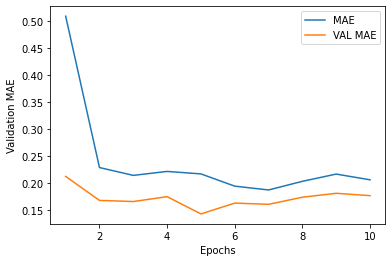

In [21]:
# LOG RESULTS - Max Average Error on train set and validation set
# MAE of 0.4 means prediction is average 400 inhabitants off from true value

import matplotlib.pyplot as plt

epochs_range = range(1,epochs+1)
plt.plot(epochs_range, history.history["mae"], label="MAE")
plt.plot(epochs_range, history.history["val_mae"], label="VAL MAE")
plt.legend()

plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [22]:
# EVALUATION

loss, mae = model.evaluate(x_test, y_test)
print ("Average population error : {} inhabitants".format(round(mae * 1000)))

230/230 [==============================] - 0s 1ms/step - loss: 0.7807 - mae: 0.1680
Average population error : 168 inhabitants
